In [1]:
import folium
import pandas as pd
import requests
import json

In [2]:
r=requests.get('https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json')
c=r.content
seoul_geo=json.loads(c)
seoul_geo

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'code': '11250',
    'name': '강동구',
    'name_eng': 'Gangdong-gu',
    'base_year': '2013'},
   'geometry': {'type': 'Polygon',
    'coordinates': [[[127.11519584981606, 37.557533180704915],
      [127.11879551821994, 37.557222485451305],
      [127.12146867175024, 37.55986003393365],
      [127.12435254630417, 37.56144246249796],
      [127.13593925898998, 37.56564793048277],
      [127.14930548011061, 37.56892250303897],
      [127.15511020940411, 37.57093642128295],
      [127.16683184366129, 37.57672487388627],
      [127.17038810813094, 37.576465605301046],
      [127.17607118428914, 37.57678573961056],
      [127.17905504160184, 37.57791388161732],
      [127.17747787800164, 37.57448983055031],
      [127.1781775408844, 37.571481967974336],
      [127.17995281860672, 37.569309661290504],
      [127.18122821955262, 37.56636089217979],
      [127.18169407550688, 37.56286338914073],
      [127.18408792

In [3]:
map=folium.Map(location=[37.566345, 126.977893], zoom_start=10)
folium.GeoJson(seoul_geo, name='지역구').add_to(map)
map

In [4]:
cb=pd.read_csv('data/CoffeeBean.csv', index_col=0, header=0)
cb


,store,address,phone
0,학동역 DT점,서울시 강남구 학동로 211 1층,02-3444-9973
1,수서점,서울시 강남구 광평로 280 수서동 724호,02-3412-2326
2,차병원점,서울시 강남구 논현로 566 강남차병원1층,02-538-7615
3,강남대로점,서울시 서초구 강남대로 369 1층,02-588-5778
4,메가박스점,서울 강남구 삼성동 159 코엑스몰 지하2층,02-6002-3320
...,...,...,...
238,인천공항 제2여객터미널 입구점,인천광역시 중구 운서동 2868 인천공항 제2터미널 1층 연번(23-124),032-743-2894
239,부산서면서전로점,"부산광역시 부산진구 서전로 12, 1층",051-819-8708
240,분당차병원본관앞점,경기도 성남시 분당구 야탑로64 DS타워 1층,031-8017-8243
241,신용산역래미안점,서울시 용산구 한강대로95,02-2074-1049


In [5]:
addr=pd.DataFrame(cb.address.apply(lambda v: v.split()[:2]).tolist(),columns=['시도','구군'])
addr


,시도,구군
0,서울시,강남구
1,서울시,강남구
2,서울시,강남구
3,서울시,서초구
4,서울,강남구
...,...,...
238,인천광역시,중구
239,부산광역시,부산진구
240,경기도,성남시
241,서울시,용산구


In [6]:
addr.시도.unique()

array(['서울시', '서울', '서울특별시', '부산광역시', '인천광역시', '대전시', '경기도', '경남', '충북',
       '세종특별자치시', '울산광역시', '대구광역시', '경기', '경상북도', '경상남도', '부산시', '강원도',
       '인천'], dtype=object)

In [7]:
addr_aliase={'서울':'서울특별시','서울시':'서울특별시'} #서울만 쓸거니까 서울만 고쳐주기 다른 시도도 들어가면 다 고쳐야함
addr['시도']=addr['시도'].apply(lambda v: addr_aliase.get(v,v))
addr

,시도,구군
0,서울특별시,강남구
1,서울특별시,강남구
2,서울특별시,강남구
3,서울특별시,서초구
4,서울특별시,강남구
...,...,...
238,인천광역시,중구
239,부산광역시,부산진구
240,경기도,성남시
241,서울특별시,용산구


In [8]:
addr2=addr.loc[addr.시도=='서울특별시',:]
addr2

,시도,구군
0,서울특별시,강남구
1,서울특별시,강남구
2,서울특별시,강남구
3,서울특별시,서초구
4,서울특별시,강남구
...,...,...
233,서울특별시,강서구
234,서울특별시,송파구
235,서울특별시,영등포구
241,서울특별시,용산구


In [9]:
addr_group=addr2.groupby('구군')['시도'].count()
addr_group

구군
강남구     57
강동구      4
강북구      2
강서구      3
관악구      3
광진구      4
구로구      2
금천구      2
노원구      2
동대문구     2
마포구      8
서대문구     3
서초구     24
성동구      2
성북구      3
송파구     12
양천구      3
영등포구    13
용산구      5
은평구      1
종로구     13
중구      13
중랑구      2
Name: 시도, dtype: int64

In [10]:
map=folium.Map(location=[37.566345, 126.977893], zoom_start=10)
folium.GeoJson(seoul_geo, name='지역구').add_to(map)
map.choropleth(geo_data=seoul_geo, #경계선 데이터
               data=addr_group, # 분석 데이터
               fill_color='YlOrRd',
               fill_opacity=0.5,
               line_opacity=0.2,
               key_on='properties.name', # 사용할 데이터의 이름 , geo_data, data 사이에 연결 key
               legend_name='서울특별시 구별 커피빈 매장 수'
               )
map

c:\Users\admin\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [11]:

data=pd.read_excel('data/행정구역_시군구_별__성별_인구수.xlsx')
data=data.rename(columns={'행정구역(시도)별':'시도','행정구역(군구)별':'군구','총인구수 (명)':'총인구수','남자인구수 (명)':'남자인구수','여자인구수 (명)':'여자인구수'})#바꿀이름 먼저 넣기
data

,시도,군구,총인구수,남자인구수,여자인구수
0,전국,소계,51414281,25621573,25792708
1,서울특별시,소계,9426404,4566299,4860105
2,서울특별시,종로구,141060,68170,72890
3,서울특별시,중구,120963,58699,62264
4,서울특별시,용산구,217756,104640,113116
...,...,...,...,...,...
287,경상남도,거창군,60462,29741,30721
288,경상남도,합천군,41919,20397,21522
289,제주특별자치도,소계,677031,339056,337975
290,제주특별자치도,제주시,492593,246197,246396


In [12]:
data1=data.loc[data['시도']=='서울특별시',:] #서울특별시만 뽑아내기
data1

,시도,군구,총인구수,남자인구수,여자인구수
1,서울특별시,소계,9426404,4566299,4860105
2,서울특별시,종로구,141060,68170,72890
3,서울특별시,중구,120963,58699,62264
4,서울특별시,용산구,217756,104640,113116
5,서울특별시,성동구,280240,136233,144007
6,서울특별시,광진구,336801,162209,174592
7,서울특별시,동대문구,337574,165933,171641
8,서울특별시,중랑구,385003,189186,195817
9,서울특별시,성북구,430100,206634,223466
10,서울특별시,강북구,292762,142028,150734


In [13]:
data2=data1.loc[data1['군구']!='소계',:] #소계 걷어내기
data2['군구']=data2.군구.apply(lambda v : v.strip()) #공백지우기
data2_group=data2.groupby('군구')['총인구수'].sum()
data2_group

C:\Users\admin\AppData\Local\Temp\ipykernel_12144\366183582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['군구']=data2.군구.apply(lambda v : v.strip()) #공백지우기


군구
강남구     532798
강동구     459982
강북구     292762
강서구     568287
관악구     487815
광진구     336801
구로구     395183
금천구     229307
노원구     502515
도봉구     310509
동대문구    337574
동작구     380201
마포구     365570
서대문구    308437
서초구     404831
성동구     280240
성북구     430100
송파구     658006
양천구     439219
영등포구    376614
용산구     217756
은평구     464871
종로구     141060
중구      120963
중랑구     385003
Name: 총인구수, dtype: int64

In [14]:
map=folium.Map(location=[37.566345, 126.977893], zoom_start=10)
folium.GeoJson(seoul_geo, name='지역구').add_to(map)
map.choropleth(geo_data=seoul_geo,
               data=data2_group,
               fill_color='YlOrRd',
               fill_opacity=0.5,
               line_opacity=0.2,
               key_on='properties.name', 
               legend_name='서울특별시 구별 총 인구 수'
               )
map

c:\Users\admin\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [15]:
pubdata=pd.read_csv('data/보건복지부_공공보건 의료기관 현황_20161231.csv', index_col=0)
pubdata

,병원 명,설립형태,근거 법령,관계 행정기관,관계 공공단체,심평원 요양기관번호,종별구분,병상수,소재지 우편번호,주소,홈페이지,대표전화,FAX,비고
연번,,,,,,,,,,,,,,
1,강원도 재활병원,시도립,강원도재활병원설치및운영에관한조례,강원도,해당없음,32200641,병원,165,24227,강원도 춘천시 충열로 142번길 24-16,www.grh.or.kr,033-248-7700,033-248-7723,NaN
2,강원도 삼척의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100060,종합병원,152,25920,강원도 삼척시 오십천로 418,http://ksmc.or.kr,033-572-1141,033-573-8424,NaN
3,강원도 영월의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100078,종합병원,214,26234,강원도 영월군 영월읍 중앙1로 59,http://www.youngwol.org,033-370-9117,033-370-9137,NaN
4,강원도 원주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100086,종합병원,237,26448,강원도 원주시 서원대로 387(개운동),www.kwmc.or.kr,033-760-4500,033-761-5121,NaN
5,강원도 강릉의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,보건복지부(강원도),지방의료원,32100159,종합병원,137,25535,강원도 강릉시 경강로 2007(남문동 164-1),http://www.gnmc.or.kr,033-646-6910,033-610-1415,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,청풍호노인사랑병원,시군구립,제천시 노인전문병원 설치및 운영에 관한 조례,충청북도,해당없음,33280576,요양병원,187,27207,충청북도 제천시 금성면 청풍호로 1147,www.cplove.co.kr,043-646-0808,043-648-5827,NaN
217,충주시 노인전문병원,시군구립,충주시노인전문병원설치 및 운영에관한 조례,충청북도,해당없음,33280088,요양병원,300,27442,충청북도 충주시 동량면 대전리 1686-28,www.hyolife.com,043-855-9393,043-855-8866,NaN
218,충청북도 충주의료원,특수법인,지방의료원의 설립 및 운영에 관한 법률,충청북도,해당없음,33100063,종합병원,292,27468,충청북도 충주시 안림로 239-50(안림동 134),www.cjmct.or.kr,043-871-0114,043-843-4231,NaN


In [16]:
addr=pd.DataFrame(pubdata['주소'].apply(lambda v : v.split()[:2]).tolist(), columns=['시도','군구'])
addr

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


In [17]:
addr.시도.unique()

array(['강원도', '경기도', '경기', '경남', '창원시', '경상남도', '경상북도', '경산시', '경북',
       '인천광역시', '대구광역시', '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시',
       '전라북도', '충북', '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도',
       '울산광역시', '전북', '천안시', '충청북도'], dtype=object)

In [18]:
addr[addr['시도']=='천안시']

,시도,군구
209,천안시,동남구
210,천안시,동남구


In [19]:
addr.iloc[27]=['경상남도','창원시']
addr.iloc[31]=['경상남도','창원시']

In [20]:
addr.iloc[47]=['경상북도','경산시']

In [21]:
addr.iloc[209]=['충청남도','천안시']
addr.iloc[210]=['충청남도','천안시']

In [22]:
addr.시도.unique()

array(['강원도', '경기도', '경기', '경남', '경상남도', '경상북도', '경북', '인천광역시', '대구광역시',
       '전라남도', '대전광역시', '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충북',
       '서울특별시', '서울시', '부산특별시', '대전시', '충남', '전남', '충청남도', '울산광역시', '전북',
       '충청북도'], dtype=object)

In [23]:
addr_aliase={'경기':'경기도','경남':'경상남도', '경북':'경상북도', '전남':'전라남도', '전북':'전라북도', '충북':'충청북도', '서울시':'서울특별시', '부산특별시':'부산광역시', '대전시':'대전광역시', '충남':'충청남도'} 
addr['시도']=addr['시도'].apply(lambda v: addr_aliase.get(v,v))
addr

,시도,군구
0,강원도,춘천시
1,강원도,삼척시
2,강원도,영월군
3,강원도,원주시
4,강원도,강릉시
...,...,...
222,충청북도,제천시
223,충청북도,충주시
224,충청북도,충주시
225,충청북도,영동군


In [24]:
addr.군구.unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '아란13길', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군',
       '강동구', '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군',
       '양구군', '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구',
       '노원구', '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군',
       '연제구', '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구',
       '성동구', '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군',
       '진도군', '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시',
       '남원시', '군산시', '고창군', '진안군', '제주시', '서귀포시', '천안시', '보령시', '서산시',
       '서천

In [25]:
addr[addr['군구']=='동매로']

,시도,군구
155,부산광역시,동매로


In [26]:
addr.iloc[75]=['제주특별자치도','제주시']

In [27]:
addr['시도군구']=addr.apply(lambda r:r['시도']+' '+r['군구'], axis=1)
addr['count']=0
addr.loc[addr['시도군구']=='강원도 춘천시',:]

,시도,군구,시도군구,count
0,강원도,춘천시,강원도 춘천시,0
6,강원도,춘천시,강원도 춘천시,0
69,강원도,춘천시,강원도 춘천시,0
105,강원도,춘천시,강원도 춘천시,0
142,강원도,춘천시,강원도 춘천시,0


In [28]:
addr.loc[addr['시도']=='부산광역시']

,시도,군구,시도군구,count
76,부산광역시,서구,부산광역시 서구,0
93,부산광역시,사상구,부산광역시 사상구,0
98,부산광역시,해운대구,부산광역시 해운대구,0
136,부산광역시,기장군,부산광역시 기장군,0
150,부산광역시,사상구,부산광역시 사상구,0
151,부산광역시,북구,부산광역시 북구,0
152,부산광역시,연제구,부산광역시 연제구,0
153,부산광역시,연제구,부산광역시 연제구,0
154,부산광역시,해운대구,부산광역시 해운대구,0
155,부산광역시,동매로,부산광역시 동매로,0


In [29]:
addr.loc[addr['시도군구']=='부산광역시 연제구',:]

,시도,군구,시도군구,count
152,부산광역시,연제구,부산광역시 연제구,0
153,부산광역시,연제구,부산광역시 연제구,0


In [30]:
addr_group=pd.DataFrame(addr.groupby(['시도','군구','시도군구'],as_index=False).count())
addr_group=addr_group.set_index('시도군구')
addr_group

,시도,군구,count
시도군구,,,
강원도 강릉시,강원도,강릉시,4
강원도 동해시,강원도,동해시,1
강원도 삼척시,강원도,삼척시,1
강원도 속초시,강원도,속초시,1
강원도 양구군,강원도,양구군,1
...,...,...,...
충청북도 영동군,충청북도,영동군,1
충청북도 제천시,충청북도,제천시,1
충청북도 청원군,충청북도,청원군,1


In [31]:
# data : 행정구역별 인구수 데이터

data['군구']=data.군구.apply(lambda v : v.strip()) #공백지우기
data=data.loc[data['군구']!='소계',:] #소계 걷어내기
data['시도군구']=data.apply(lambda v : v['시도']+' '+v['군구'], axis=1)
data=data.set_index('시도군구')
data

C:\Users\admin\AppData\Local\Temp\ipykernel_12144\113427178.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['시도군구']=data.apply(lambda v : v['시도']+' '+v['군구'], axis=1)


,시도,군구,총인구수,남자인구수,여자인구수
시도군구,,,,,
서울특별시 종로구,서울특별시,종로구,141060,68170,72890
서울특별시 중구,서울특별시,중구,120963,58699,62264
서울특별시 용산구,서울특별시,용산구,217756,104640,113116
서울특별시 성동구,서울특별시,성동구,280240,136233,144007
서울특별시 광진구,서울특별시,광진구,336801,162209,174592
...,...,...,...,...,...
경상남도 함양군,경상남도,함양군,37386,18137,19249
경상남도 거창군,경상남도,거창군,60462,29741,30721
경상남도 합천군,경상남도,합천군,41919,20397,21522


In [32]:
addr_data_merge=pd.merge(addr_group, data, left_index=True, right_index=True)
addr_data_merge

,시도_x,군구_x,count,시도_y,군구_y,총인구수,남자인구수,여자인구수
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,4,강원도,강릉시,210678,104419,106259
강원도 동해시,강원도,동해시,1,강원도,동해시,89186,45323,43863
강원도 삼척시,강원도,삼척시,1,강원도,삼척시,63487,32220,31267
강원도 속초시,강원도,속초시,1,강원도,속초시,82541,40885,41656
강원도 양구군,강원도,양구군,1,강원도,양구군,21351,11213,10138
...,...,...,...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,충청북도,단양군,27687,14097,13590
충청북도 영동군,충청북도,영동군,1,충청북도,영동군,44730,22385,22345
충청북도 제천시,충청북도,제천시,1,충청북도,제천시,131551,66169,65382


In [33]:
addr_data_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 138 entries, 강원도 강릉시 to 충청북도 충주시
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시도_x    138 non-null    object
 1   군구_x    138 non-null    object
 2   count   138 non-null    int64 
 3   시도_y    138 non-null    object
 4   군구_y    138 non-null    object
 5   총인구수    138 non-null    int64 
 6   남자인구수   138 non-null    int64 
 7   여자인구수   138 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 9.7+ KB


In [34]:
addr_data_merge2=addr_data_merge[['시도_x', '군구_x', 'count', '총인구수']]
addr_data_merge2=addr_data_merge2.rename(columns={'시도_x':'시도', '군구_x':'군구'})
count=addr_data_merge2['count']
population=addr_data_merge2['총인구수']
addr_data_merge2['mc_ratio']=count/population*100000 #인구수 대비 의료기관 비율
addr_data_merge2

,시도,군구,count,총인구수,mc_ratio
시도군구,,,,,
강원도 강릉시,강원도,강릉시,4,210678,1.898632
강원도 동해시,강원도,동해시,1,89186,1.121252
강원도 삼척시,강원도,삼척시,1,63487,1.575126
강원도 속초시,강원도,속초시,1,82541,1.211519
강원도 양구군,강원도,양구군,1,21351,4.683621
...,...,...,...,...,...
충청북도 단양군,충청북도,단양군,1,27687,3.611803
충청북도 영동군,충청북도,영동군,1,44730,2.235636
충청북도 제천시,충청북도,제천시,1,131551,0.760161


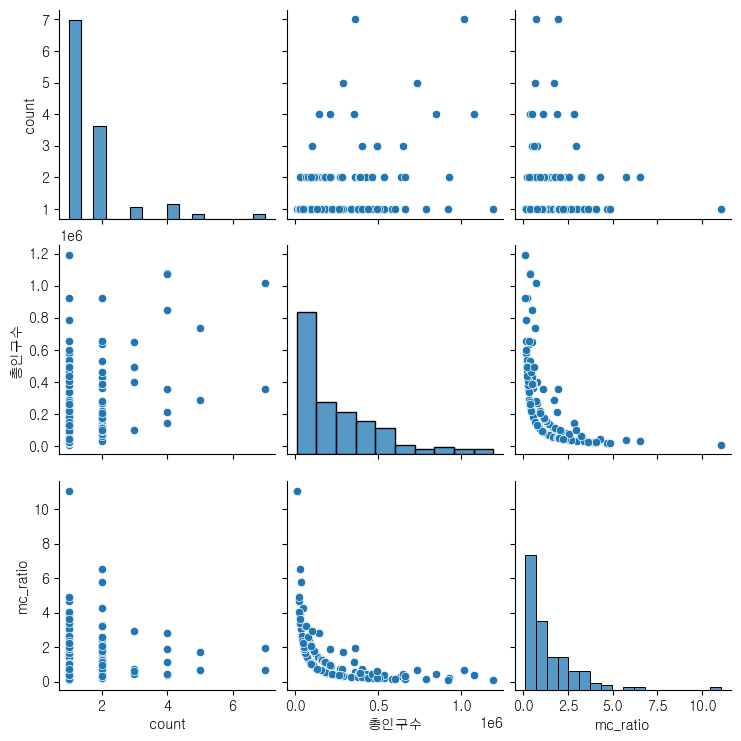

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc,font_manager
font_path='C:/Windows/Fonts/gulim.ttc'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.rcParams['figure.figsize']=(10,9)
plt.rcParams['axes.unicode_minus']=False #축의 마이너스 기호를 유니코드로 바꾸지마라

sns.pairplot(addr_data_merge2)
plt.show()

In [36]:
data_draw_korea=pd.read_csv('data/data_draw_korea.csv', index_col=0)
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역
0,202520,강릉,11,4,1040.07,강원도,강릉시
1,25589,고성(강원),9,0,664.19,강원도,고성군
2,86747,동해,11,5,180.01,강원도,동해시
3,63986,삼척,11,8,1185.80,강원도,삼척시
4,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
224,127462,제천,8,10,882.47,충청북도,제천시
225,34480,증평,6,11,81.84,충청북도,증평군
226,62809,진천,5,11,406.08,충청북도,진천군
227,790216,청주,6,12,932.51,충청북도,청주시


In [37]:
data_draw_korea['시도군구']=data_draw_korea.apply(lambda r : r['광역시도'] +' '+r['행정구역'], axis=1) #붙는게 옆으로 붙어야해서 axis=1
data_draw_korea=data_draw_korea.set_index('시도군구') # 인덱스 설정
data_draw_korea

,인구수,shortName,x,y,면적,광역시도,행정구역
시도군구,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시
...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군


In [38]:
merge_data=pd.merge(data_draw_korea, addr_data_merge2, how='outer', left_index=True, right_index=True) # 각 데이터의 없는 항목들도 다 넣어주기
merge_data

,인구수,shortName,x,y,면적,광역시도,행정구역,시도,군구,count,총인구수,mc_ratio
시도군구,,,,,,,,,,,,
강원도 강릉시,202520,강릉,11,4,1040.07,강원도,강릉시,강원도,강릉시,4.0,210678.0,1.898632
강원도 고성군,25589,고성(강원),9,0,664.19,강원도,고성군,NaN,NaN,NaN,NaN,NaN
강원도 동해시,86747,동해,11,5,180.01,강원도,동해시,강원도,동해시,1.0,89186.0,1.121252
강원도 삼척시,63986,삼척,11,8,1185.80,강원도,삼척시,강원도,삼척시,1.0,63487.0,1.575126
강원도 속초시,76733,속초,9,1,105.25,강원도,속초시,강원도,속초시,1.0,82541.0,1.211519
...,...,...,...,...,...,...,...,...,...,...,...,...
충청북도 제천시,127462,제천,8,10,882.47,충청북도,제천시,충청북도,제천시,1.0,131551.0,0.760161
충청북도 증평군,34480,증평,6,11,81.84,충청북도,증평군,NaN,NaN,NaN,NaN,NaN
충청북도 진천군,62809,진천,5,11,406.08,충청북도,진천군,NaN,NaN,NaN,NaN,NaN


In [39]:
BORDER_LINES = [
    [(3, 2), (5, 2), (5, 3), (9, 3), (9, 1)], # 인천
    [(2, 5), (3, 5), (3, 4), (8, 4), (8, 7), (7, 7), (7, 9), (4, 9), (4, 7), (1, 7)], # 서울
    [(1, 6), (1, 9), (3, 9), (3, 10), (8, 10), (8, 9),
     (9, 9), (9, 8), (10, 8), (10, 5), (9, 5), (9, 3)], # 경기도
    [(9, 12), (9, 10), (8, 10)], # 강원도
    [(10, 5), (11, 5), (11, 4), (12, 4), (12, 5), (13, 5),
     (13, 4), (14, 4), (14, 2)], # 충청남도
    [(11, 5), (12, 5), (12, 6), (15, 6), (15, 7), (13, 7),
     (13, 8), (11, 8), (11, 9), (10, 9), (10, 8)], # 충청북도
    [(14, 4), (15, 4), (15, 6)], # 대전시
    [(14, 7), (14, 9), (13, 9), (13, 11), (13, 13)], # 경상북도
    [(14, 8), (16, 8), (16, 10), (15, 10),
     (15, 11), (14, 11), (14, 12), (13, 12)], # 대구시
    [(15, 11), (16, 11), (16, 13)], # 울산시
    [(17, 1), (17, 3), (18, 3), (18, 6), (15, 6)], # 전라북도
    [(19, 2), (19, 4), (21, 4), (21, 3), (22, 3), (22, 2), (19, 2)], # 광주시
    [(18, 5), (20, 5), (20, 6)], # 전라남도
    [(16, 9), (18, 9), (18, 8), (19, 8), (19, 9), (20, 9), (20, 10)], # 부산시
]

In [40]:
font_path='C:/Windows/Fonts/gulim.ttc'
font_name=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)



In [41]:
import numpy as np

def draw_block_map(blockedMap, targetData, title, color):
    whitelabelmin=(max(blockedMap[targetData])-min(blockedMap[targetData])) \
    *0.2+min(blockedMap[targetData])

    datalable=targetData
    vmin=min(blockedMap[targetData])
    vmax=max(blockedMap[targetData])
    mapdata=blockedMap.pivot(index='y', columns='x', values=targetData)
    masked_mapdata=np.ma.masked_where(np.isnan(mapdata), mapdata)

    plt.figure(figsize=(8,13))
    plt.title(title)
    plt.pcolor(masked_mapdata, vmin=vmin, vmax=vmax, cmap=color, edgecolor='#aaaaaa', linewidth=0.5)

    #지역이름표시
    for idx, row in blockedMap.iterrows():
        annocolor='white' if row[targetData] > whitelabelmin else 'black'

        if row['광역시도'].endswith('시') and not row['광역시도'].startswith('세종'): #광역시도가 시로 끝나고 세종으로 시작안하는
            dispname='{}\n{}'.format(row['광역시도'][:2], row['행정구역'][:-1]) # 광역시도 앞에 두개만 , 행정구역 뒤에서 하나는 빼겠다
            if len(row['행정구역'])<=2:
                dispname+=row['행정구역'][-1] # 뒤에서 하나 뺀것을 다시 붙이겠다
        else:
            dispname=row['행정구역'] [:-1] 

        if len(dispname.splitlines()[-1])>=3: #라인으로 짤라서 맨마지막 라인의 글자가 3개 이상일때
            fontsize, linespacing=9.5,1.5
        else:
            fontsize, linespacing=11, 1.2

        plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold', fontsize=fontsize, ha='center', va='center', color=annocolor, linespacing=linespacing)    

    for path in BORDER_LINES:
        ys, xs=zip(*path)
        plt.plot(xs,ys, c='black', lw=4) 

    plt.gca().invert_yaxis()
    plt.axis('off')

    cb=plt.colorbar(shrink=.1, aspect=10)
    cb.set_label(datalable)
    plt.tight_layout()
    plt.savefig('data/blockMap'+targetData+'.jpg')
    

    
    plt.show()

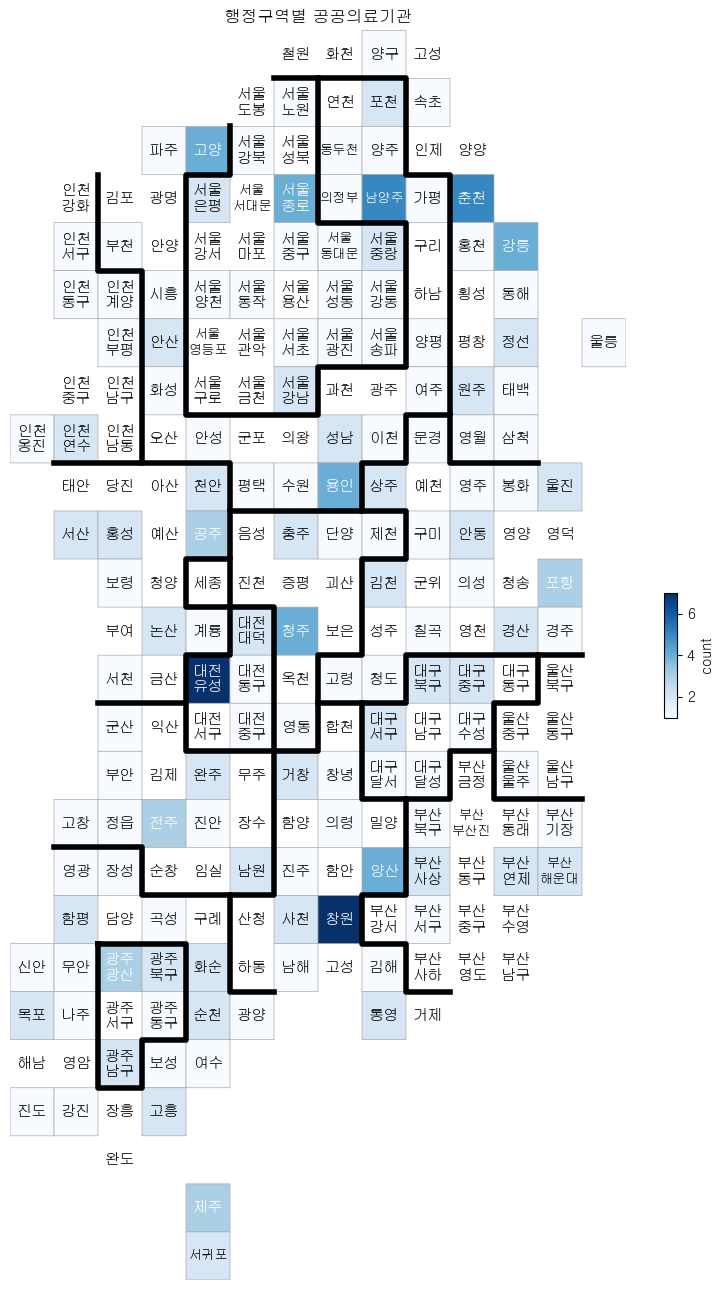

In [42]:
draw_block_map(merge_data, 'count', '행정구역별 공공의료기관', 'Blues')

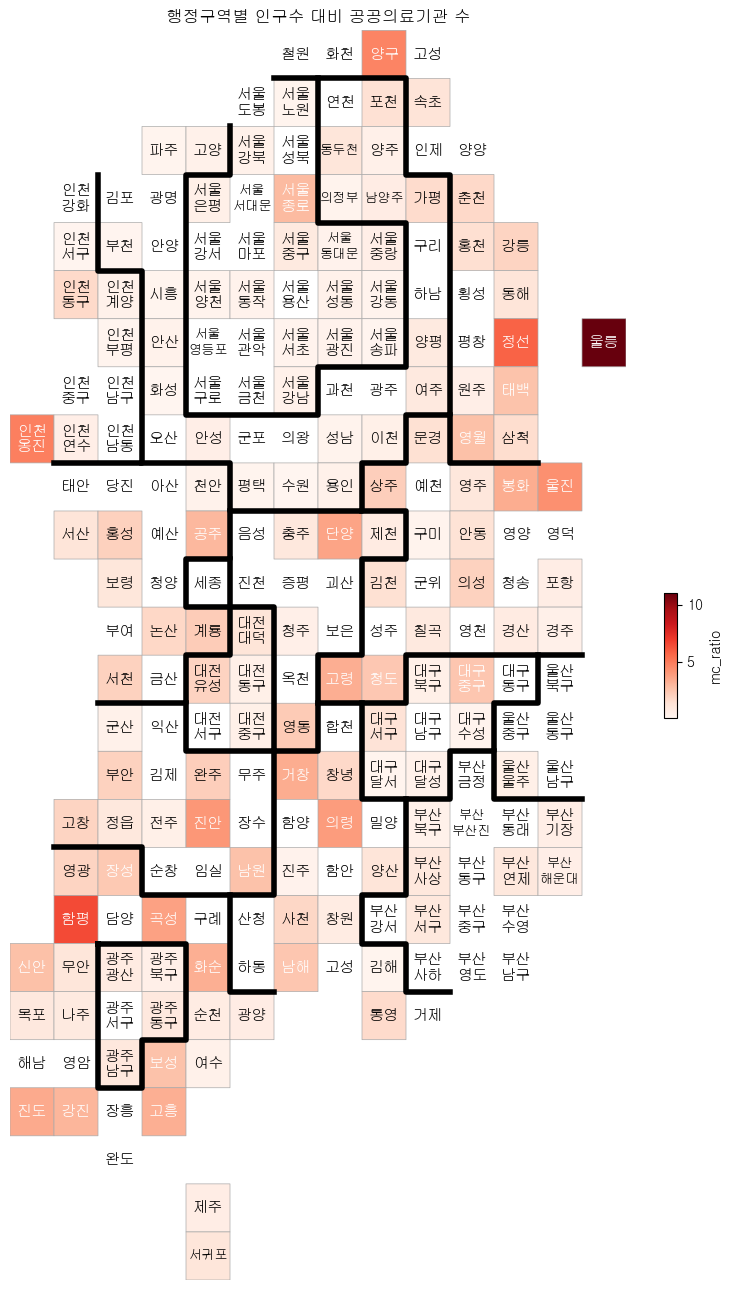

In [43]:
draw_block_map(merge_data, 'mc_ratio', '행정구역별 인구수 대비 공공의료기관 수', 'Reds')

In [44]:
a=[1,2,3,4]
b=[10,20,30,40]

c=zip(a,b)
for i in c:
    print(*c)

(2, 20) (3, 30) (4, 40)


In [45]:

g1=pd.read_excel('data/5대+범죄+발생현황_20230428134012.xlsx')
g2=g1.drop([g1.index[0], g1.index[1]], axis=0)
g2

,자치구별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5
2,소계,80445,124,122,4911,33531,41757
3,종로구,2712,6,4,156,1079,1467
4,중구,2861,6,6,161,1279,1409
5,용산구,2381,3,1,141,945,1291
6,성동구,2112,3,4,110,905,1090
7,광진구,3087,5,4,208,1414,1456
8,동대문구,2959,3,7,169,1240,1540
9,중랑구,3210,4,6,141,1399,1660
10,성북구,2411,4,2,118,895,1392
11,강북구,2301,4,1,136,777,1383


In [46]:
g2=g2.rename(columns={'자치구별(2)':'구별'})
g2

,구별,2021,2021.1,2021.2,2021.3,2021.4,2021.5
2,소계,80445,124,122,4911,33531,41757
3,종로구,2712,6,4,156,1079,1467
4,중구,2861,6,6,161,1279,1409
5,용산구,2381,3,1,141,945,1291
6,성동구,2112,3,4,110,905,1090
7,광진구,3087,5,4,208,1414,1456
8,동대문구,2959,3,7,169,1240,1540
9,중랑구,3210,4,6,141,1399,1660
10,성북구,2411,4,2,118,895,1392
11,강북구,2301,4,1,136,777,1383


In [47]:
g3=g2.loc[g2['구별']!='소계',:] #소계 걷어내기
g3['구별']=g3.구별.apply(lambda v : v.strip()) #공백지우기
g3_group=g3.groupby('구별')['2021'].sum()
g3_group

C:\Users\admin\AppData\Local\Temp\ipykernel_12144\490042517.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g3['구별']=g3.구별.apply(lambda v : v.strip()) #공백지우기


구별
강남구     6146
강동구     3458
강북구     2301
강서구     3896
관악구     4444
광진구     3087
구로구     3486
금천구     2439
노원구     3425
도봉구     1860
동대문구    2959
동작구     2631
마포구     3540
서대문구    2278
서초구     3656
성동구     2112
성북구     2411
송파구     4714
양천구     3015
영등포구    4179
용산구     2381
은평구     3244
종로구     2712
중구      2861
중랑구     3210
Name: 2021, dtype: object

In [48]:
map=folium.Map(location=[37.566345, 126.977893], zoom_start=10)
folium.GeoJson(seoul_geo, name='지역구').add_to(map)
map.choropleth(geo_data=seoul_geo,
               data=g3_group,
               fill_color='YlOrRd',
               fill_opacity=0.5,
               line_opacity=0.2,
               key_on='properties.name', 
               legend_name='서울특별시 구별 5대범죄율'
               )
map

c:\Users\admin\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [49]:
p1=pd.read_excel('data/숙제_행정구역_시군구_별_성별_인구수_202304281337481.xlsx')
p1

,행정구역(시)별,행정구역(군구)별,2010총인구수 (명),2020총인구수 (명),인구증감,인구증감률
0,전국,소계,50515666,51829023,1313357.0,0.025999
1,서울특별시,소계,10312545,9668465,-644080.0,-0.062456
2,서울특별시,종로구,170578,149384,-21194.0,-0.124248
3,서울특별시,중구,132822,125240,-7582.0,-0.057084
4,서울특별시,용산구,244853,230040,-14813.0,-0.060498
...,...,...,...,...,...,...
298,경상남도,거창군,63421,61502,-1919.0,-0.030258
299,경상남도,합천군,51092,44006,-7086.0,-0.138691
300,제주특별자치도,소계,571255,674635,103380.0,0.180970
301,제주특별자치도,제주시,417539,492466,74927.0,0.179449


In [51]:
p2=p1[['행정구역(시)별', '행정구역(군구)별', '인구증감률']]
p2

,행정구역(시)별,행정구역(군구)별,인구증감률
0,전국,소계,0.025999
1,서울특별시,소계,-0.062456
2,서울특별시,종로구,-0.124248
3,서울특별시,중구,-0.057084
4,서울특별시,용산구,-0.060498
...,...,...,...
298,경상남도,거창군,-0.030258
299,경상남도,합천군,-0.138691
300,제주특별자치도,소계,0.180970
301,제주특별자치도,제주시,0.179449


In [54]:
p3=p2.loc[p2['행정구역(군구)별']!='소계',:] #소계 걷어내기
p3=p3.rename(columns={'행정구역(시)별':'시도','행정구역(군구)별':'군구'})#바꿀이름 먼저 넣기
p3

,시도,군구,인구증감률
2,서울특별시,종로구,-0.124248
3,서울특별시,중구,-0.057084
4,서울특별시,용산구,-0.060498
5,서울특별시,성동구,-0.050266
6,서울특별시,광진구,-0.076655
...,...,...,...
297,경상남도,함양군,-0.051387
298,경상남도,거창군,-0.030258
299,경상남도,합천군,-0.138691
301,제주특별자치도,제주시,0.179449


In [55]:
p3['군구']=p3.군구.apply(lambda v : v.strip()) #공백지우기
p3['시도군구']=p3.apply(lambda v : v['시도']+' '+v['군구'], axis=1)
p3=p3.set_index('시도군구')
p3

,시도,군구,인구증감률
시도군구,,,
서울특별시 종로구,서울특별시,종로구,-0.124248
서울특별시 중구,서울특별시,중구,-0.057084
서울특별시 용산구,서울특별시,용산구,-0.060498
서울특별시 성동구,서울특별시,성동구,-0.050266
서울특별시 광진구,서울특별시,광진구,-0.076655
...,...,...,...
경상남도 함양군,경상남도,함양군,-0.051387
경상남도 거창군,경상남도,거창군,-0.030258
경상남도 합천군,경상남도,합천군,-0.138691


In [56]:
p3.시도.unique()

array(['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도',
       '경상남도', '제주특별자치도'], dtype=object)

In [59]:
addr.시도.unique()

array(['강원도', '경기도', '경상남도', '경상북도', '인천광역시', '대구광역시', '전라남도', '대전광역시',
       '광주광역시', '제주특별자치도', '부산광역시', '전라북도', '충청북도', '서울특별시', '충청남도',
       '울산광역시'], dtype=object)

In [66]:
p3.군구.unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', '서구', '동구',
       '영도구', '부산진구', '동래구', '남구', '북구', '해운대구', '사하구', '금정구', '연제구',
       '수영구', '사상구', '기장군', '수성구', '달서구', '달성군', '중구영종출장소', '중구용유출장소',
       '미추홀구', '연수구', '남동구', '부평구', '계양구', '서구검단출장소', '강화군', '옹진군', '광산구',
       '유성구', '대덕구', '울주군', '세종시', '수원시', '장안구', '권선구', '팔달구', '영통구',
       '성남시', '수정구', '중원구', '분당구', '의정부시', '안양시', '만안구', '동안구', '부천시',
       '원미구', '소사구', '오정구', '광명시', '평택시', '송탄출장소', '안중출장소', '동두천시', '안산시',
       '상록구', '단원구', '고양시', '덕양구', '일산동구', '일산서구', '과천시', '구리시', '남양주시',
       '풍양출장소', '오산시', '시흥시', '군포시', '의왕시', '하남시', '용인시', '처인구', '기흥구',
       '수지구', '파주시', '이천시', '안성시', '김포시', '화성시', '화성시동부출장소', '화성시동탄출장소',
       '광주시', '양주시', '포천시', '여주시', '여주군', '연천군', '가평군', '양평군', '춘천시',
       '원주시', '강릉시', '동해시', '태백시', '속초시', '삼척시', '홍천군', '횡성군', '영월군',


In [67]:
addr.군구.unique()

array(['춘천시', '삼척시', '영월군', '원주시', '강릉시', '속초시', '정선군', '수원시', '이천시',
       '안성시', '의정부시', '포천시', '파주시', '용인시', '평택시', '시흥시', '여주시', '남양주시',
       '동두천시', '안산시', '부천시', '통영시', '사천시', '창원시', '김해시', '양산시', '거창군',
       '남해군', '의령군', '포항시', '김천시', '안동시', '울진군', '경주시', '구미시', '영주시',
       '상주시', '문경시', '경산시', '의성군', '청도군', '고령군', '칠곡군', '봉화군', '울릉군',
       '부평구', '북구', '순천시', '대덕구', '태백시', '동해시', '화성시', '광산구', '남구', '중구',
       '제주시', '서구', '전주시', '진주시', '청주시', '종로구', '성남시', '동구', '화순군', '강동구',
       '사상구', '달서구', '해운대구', '유성구', '가평군', '양주시', '고양시', '홍천군', '양구군',
       '청원군', '계룡시', '논산시', '함평군', '양평군', '수성구', '달성군', '연수구', '노원구',
       '기장군', '공주시', '강북구', '광진구', '나주시', '창녕군', '목포시', '고흥군', '연제구',
       '동매로', '서초구', '은평구', '중랑구', '강남구', '동작구', '동대문구', '양천구', '성동구',
       '송파구', '울주군', '계양구', '옹진군', '보성군', '광양시', '영광군', '무안군', '진도군',
       '강진군', '곡성군', '여수시', '신안군', '장성군', '완주군', '부안군', '정읍시', '남원시',
       '군산시', '고창군', '진안군', '서귀포시', '천안시', '보령시', '서산시', '서천군', '홍성군',
     

In [68]:
mer_data=pd.merge(p3, addr_data_merge2, how='outer', left_index=True, right_index=True) # 각 데이터의 없는 항목들도 다 넣어주기
mer_data

,시도_x,군구_x,인구증감률,시도_y,군구_y,count,총인구수,mc_ratio
시도군구,,,,,,,,
강원도 강릉시,강원도,강릉시,-0.023716,강원도,강릉시,4.0,210678.0,1.898632
강원도 고성군,강원도,고성군,-0.111417,NaN,NaN,NaN,NaN,NaN
강원도 동해시,강원도,동해시,-0.048753,강원도,동해시,1.0,89186.0,1.121252
강원도 삼척시,강원도,삼척시,-0.094426,강원도,삼척시,1.0,63487.0,1.575126
강원도 속초시,강원도,속초시,-0.019418,강원도,속초시,1.0,82541.0,1.211519
...,...,...,...,...,...,...,...,...
충청북도 청원구,충청북도,청원구,NaN,NaN,NaN,NaN,NaN,NaN
충청북도 청원군,충청북도,청원군,NaN,NaN,NaN,NaN,NaN,NaN
충청북도 청주시,충청북도,청주시,0.288156,충청북도,청주시,4.0,849539.0,0.470844


In [70]:
draw_block_map(mer_data, '인구증감률', '인구증감률', 'Blues')

KeyError: 'y'